# Gaussian Receptive Fields

## Description
Temporal Encoding of continous input data. 

## Paper 
Wang, J., Belatreche, A., Maguire, L., & Mcginnity, T. M. (2014). An online supervised learning method for spiking neural networks with adaptive structure. Neurocomputing, 144, 526-536.

### Contributor
Ajinkya Indulkar

In [1]:
# import libraries
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# input vector
x = X[0]
x_min = min(x)
x_max = max(x)

In [4]:
# define parameters
n = 20 # number of neurons
sigma = 0.5 # standard deviation

#### Compute Gaussian Receptive Fields

In [5]:
# compute expectation
mu = x_min + (x_max - x_min) * np.arange(0, n, 1) / (n-1)
mu

array([0.2       , 0.45789474, 0.71578947, 0.97368421, 1.23157895,
       1.48947368, 1.74736842, 2.00526316, 2.26315789, 2.52105263,
       2.77894737, 3.03684211, 3.29473684, 3.55263158, 3.81052632,
       4.06842105, 4.32631579, 4.58421053, 4.84210526, 5.1       ])

In [6]:
# compute gaussian receptive fields
grf = []
for i in range(n):
    result = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.divide(np.square(x - mu[i]),
                                                                          np.square(sigma)), 
                                                       dtype=np.double)
    grf.append(result)
grf = np.array(grf)

#### Plot Gaussian Receptive Fields

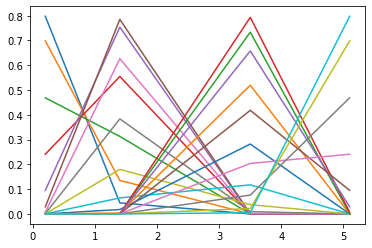

In [7]:
for i in range(n):
    plt.plot(x, grf[i])

#### Compute Spike Timings

In [44]:
spike_time_ms = 10
spike_times = []
for i in range(len(x)):
    grf_values = [-spike_time_ms*g[i]+spike_time_ms for g in grf]
    spike_times.append([-1 if g>=spike_time_ms-1 else g for g in grf_values])
    
spike_times = np.array(spike_times)

In [45]:
spike_times[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  7.59001813,  5.31335873,  3.01493464,  2.02115439])

In [46]:
spike_times.shape

(4, 20)

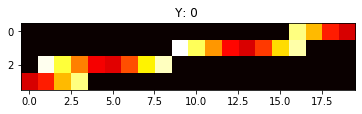

In [49]:
plt.imshow(spike_times, cmap='hot', interpolation='nearest')
plt.title("Y: {} ".format(y[0]))
plt.show()

### Packaging GRF

In [58]:
def gaussianRF(x, sigma=0.5, n=20, spike_time_ms=10):
    """
    Encoding input vector x via gaussian receptive fields
    """
    # compute max and min of input
    x_min = min(x)
    x_max = max(x)
    # compute expectation
    mu = x_min + (x_max - x_min) * np.arange(0, n, 1) / (n-1)
    # compute gaussian receptive fields
    grf = []
    for i in range(n):
        result = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.divide(np.square(x - mu[i]),
                                                                              np.square(sigma)), 
                                                           dtype=np.double)
        grf.append(result)
    grf = np.array(grf)
    spike_times = []
    for i in range(len(x)):
        grf_values = [-spike_time_ms*g[i]+spike_time_ms for g in grf]
        spike_times.append([-1 if g>=spike_time_ms-1 else g for g in grf_values])

    spike_times = np.array(spike_times)
    return spike_times

In [60]:
def visualize_spikes(spike_times, label):
    plt.figure()
    plt.imshow(spike_times, cmap='hot', interpolation='nearest')
    plt.title("Label: {} ".format(label))
    plt.show()

### Encoding IRIS Dataset using GRF

In [70]:
from sklearn import preprocessing

In [85]:
X_norm = preprocessing.normalize(X, axis=0)

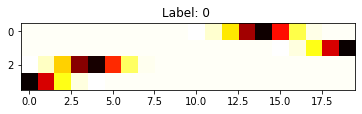

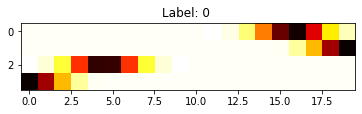

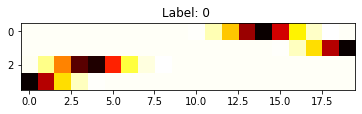

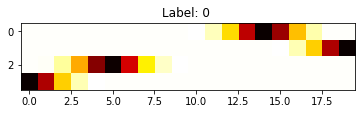

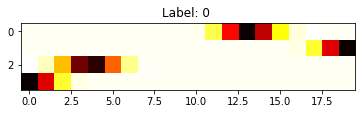

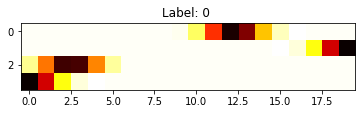

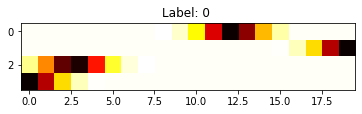

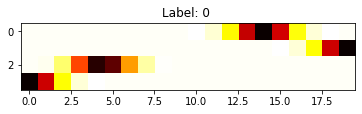

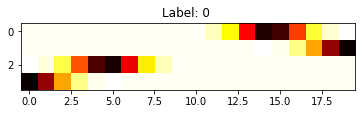

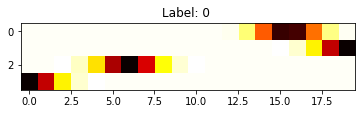

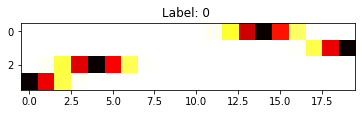

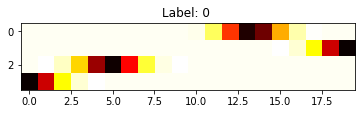

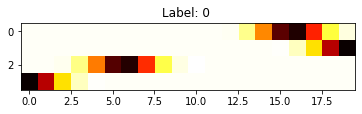

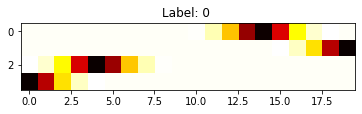

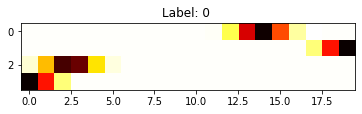

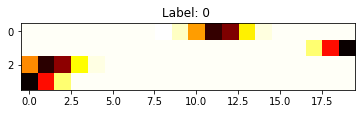

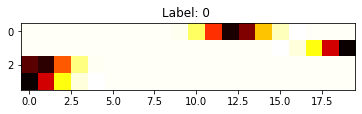

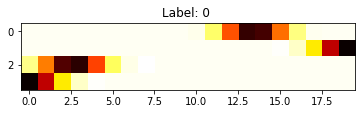

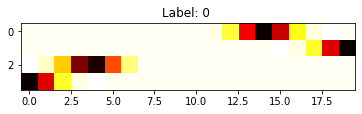

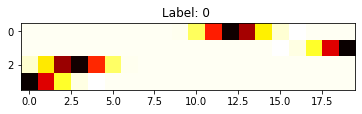

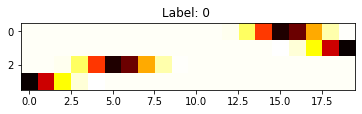

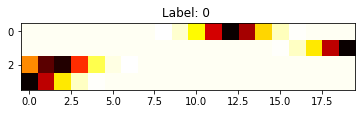

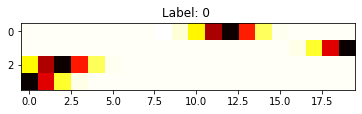

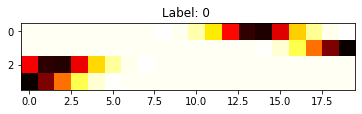

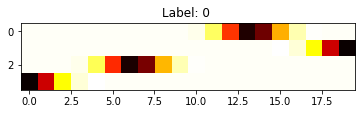

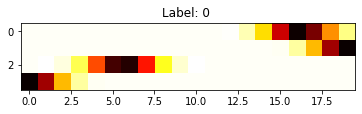

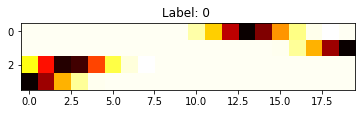

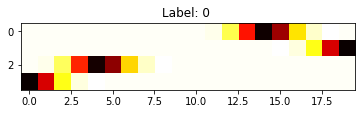

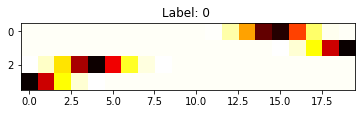

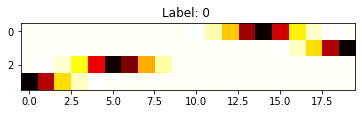

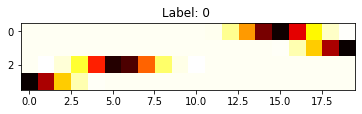

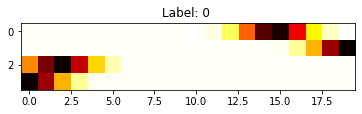

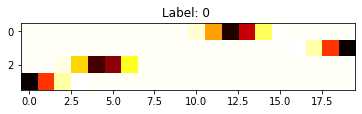

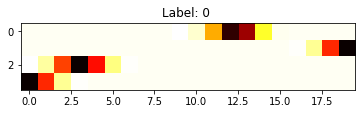

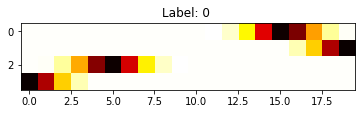

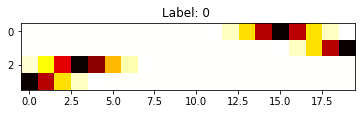

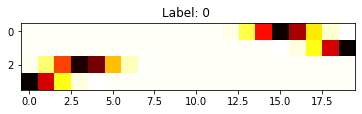

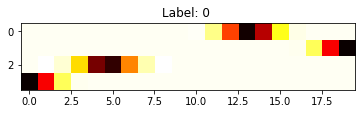

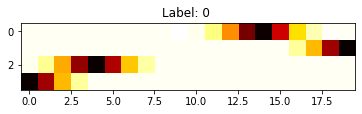

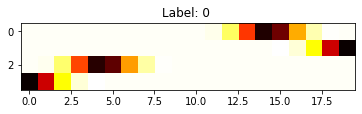

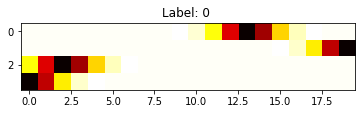

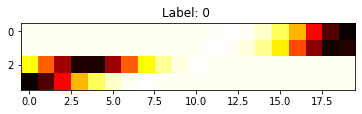

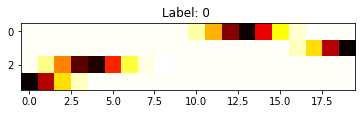

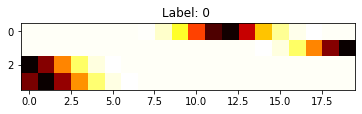

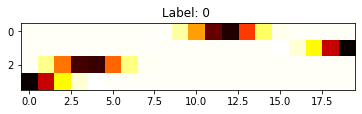

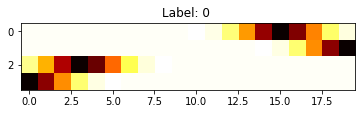

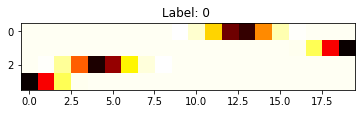

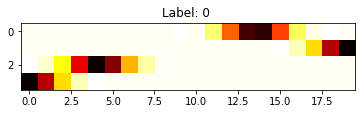

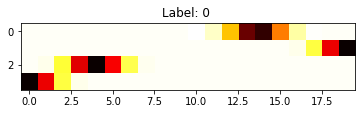

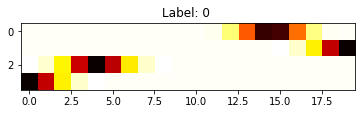

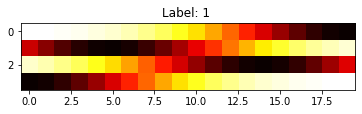

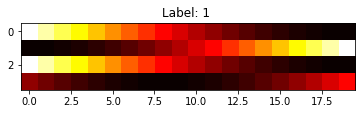

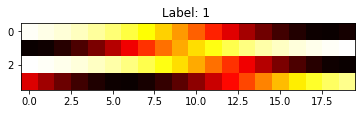

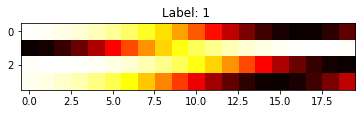

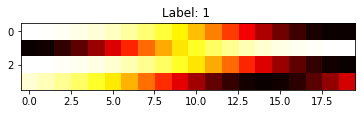

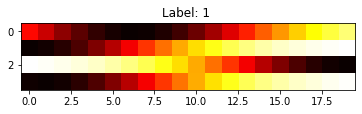

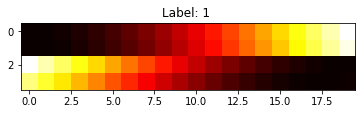

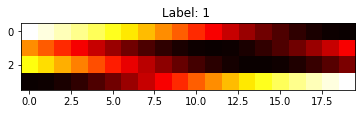

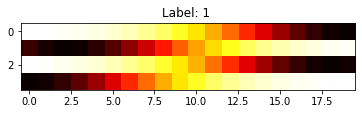

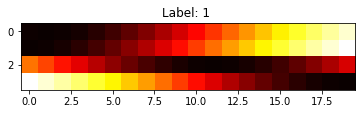

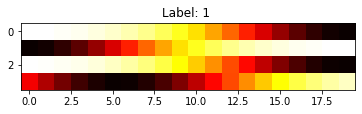

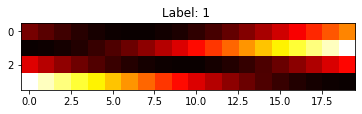

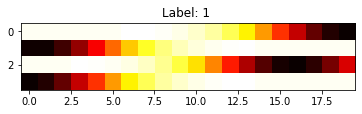

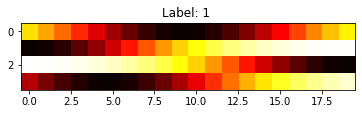

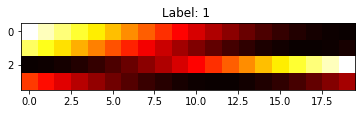

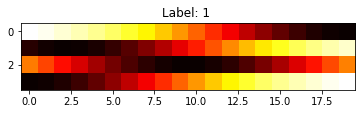

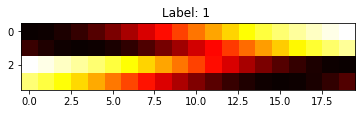

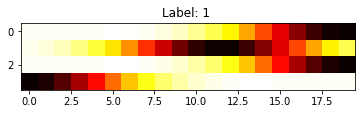

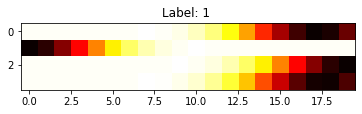

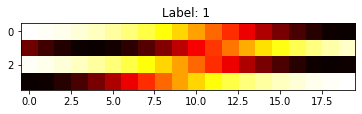

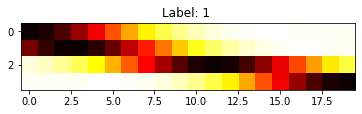

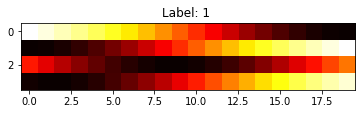

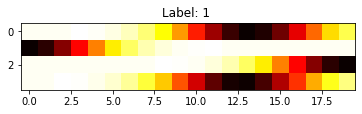

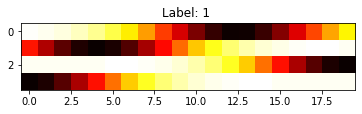

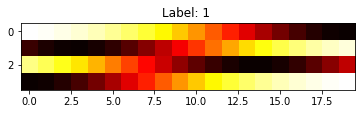

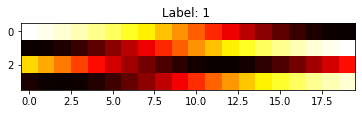

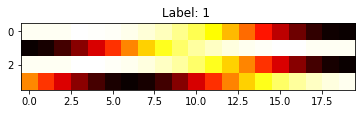

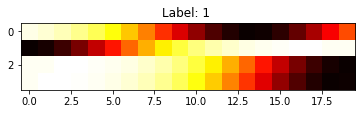

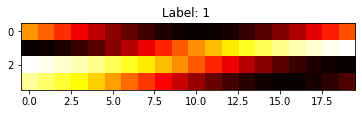

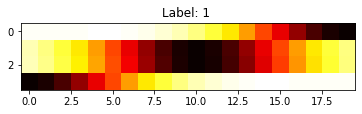

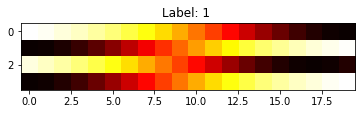

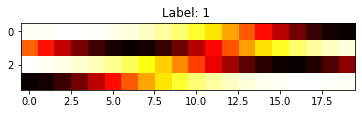

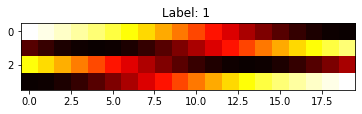

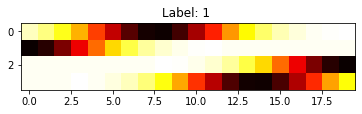

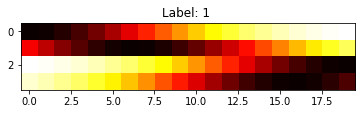

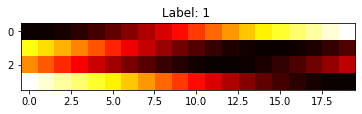

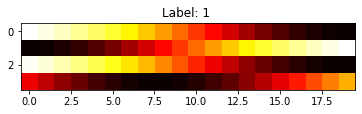

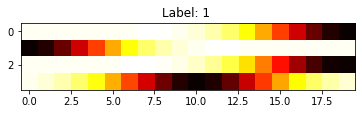

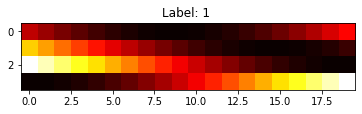

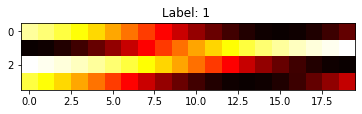

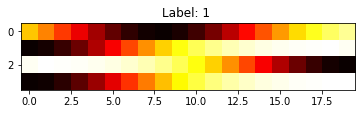

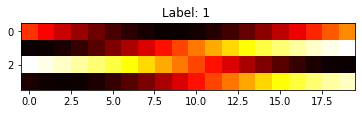

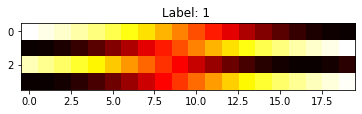

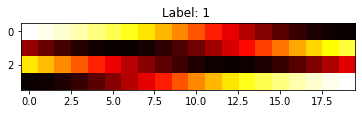

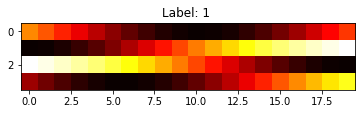

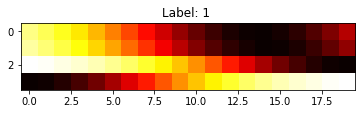

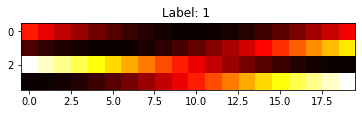

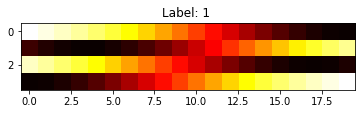

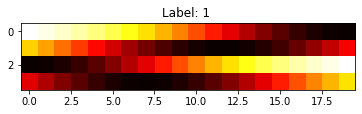

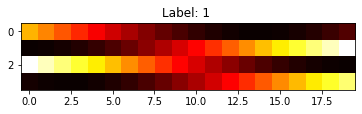

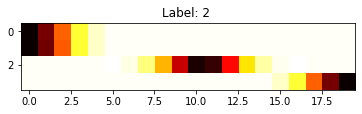

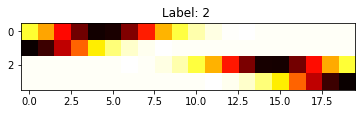

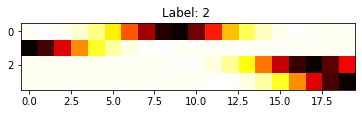

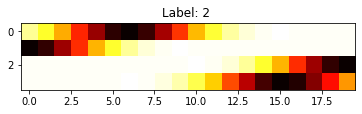

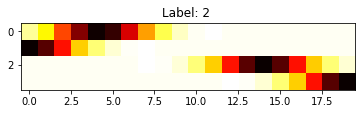

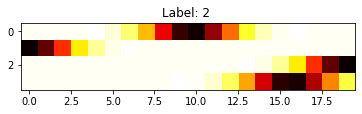

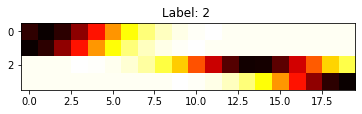

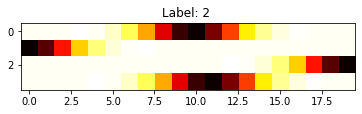

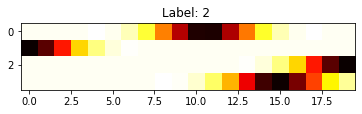

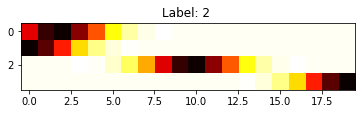

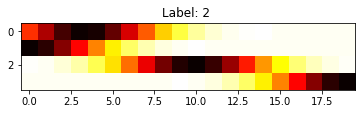

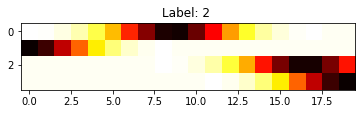

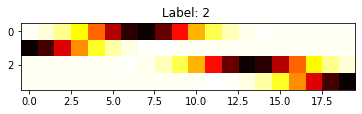

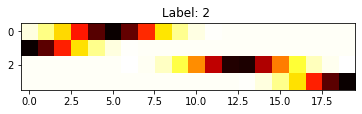

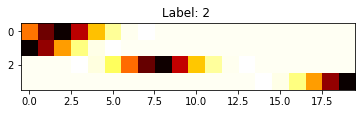

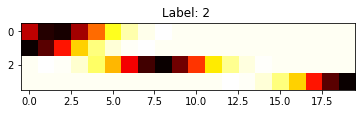

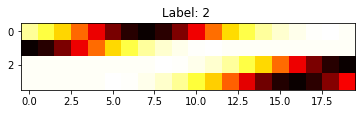

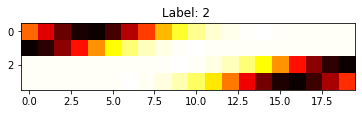

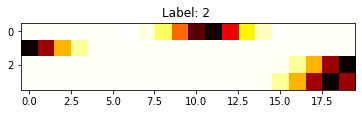

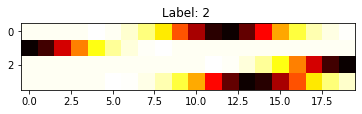

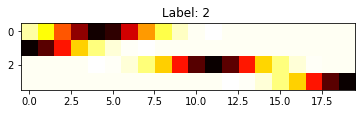

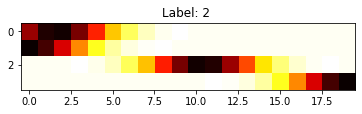

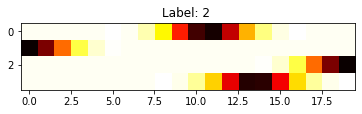

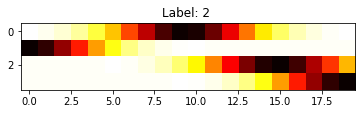

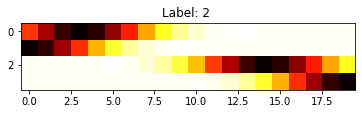

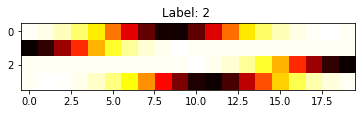

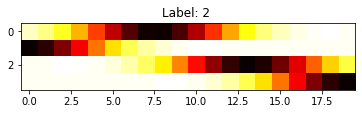

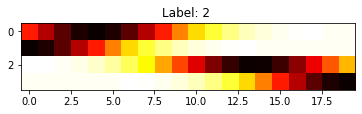

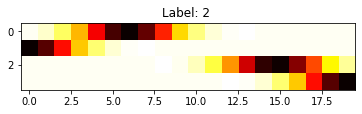

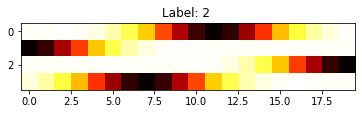

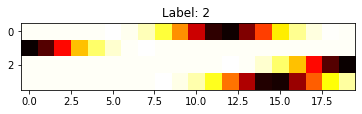

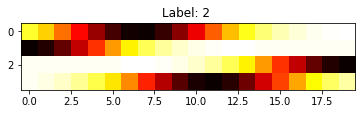

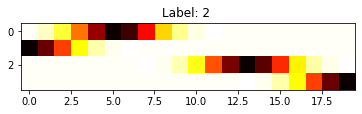

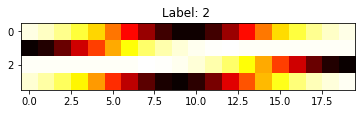

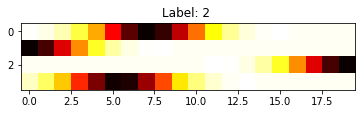

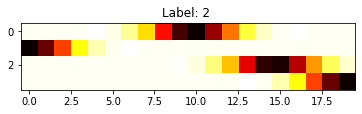

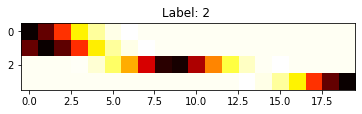

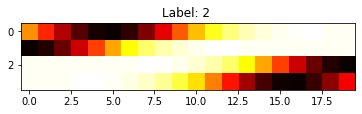

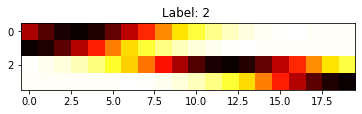

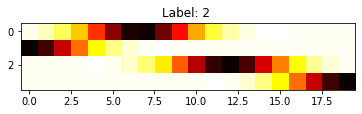

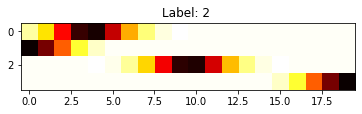

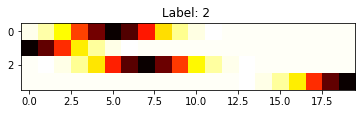

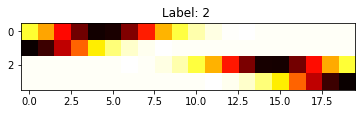

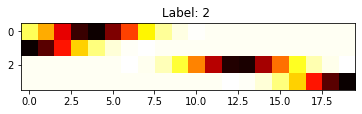

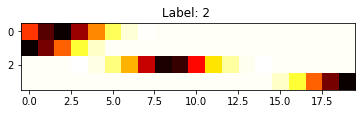

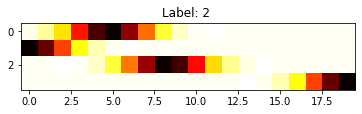

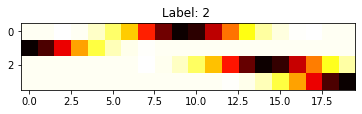

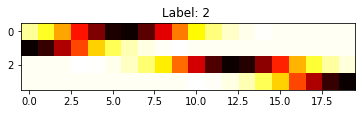

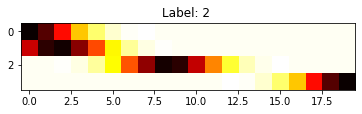

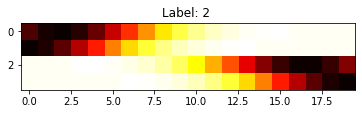

In [87]:
for i in range(len(X)):
    visualize_spikes(gaussianRF(X_norm[i], sigma=0.005, spike_time_ms=6), y[i])